In [2]:
import matplotlib.pyplot as plt
from os import rename, listdir
import os.path
import os
from itertools import cycle
import numpy as np
import glob
import pandas as pd

# 1. Extracting Physical properties in the given SNEC input models #

In [3]:
path = 'D:/python 19/05-06/Sm11p1200_energy/CURVEPOPS1-release-31-10-18/'
path1 = 'D:/python 19/05-06/Sm11p1200_energy/'
path2 = 'D:/python 19/05-06/Sm11p1200_energy/CURVEPOPS1-release-31-10-18/SNEC-models/'

temp = []
for i in os.listdir(path):
    if i[0:12] == 'listofmodels':
        data = open(path + i, 'r')
        for j in range(int(1274/2)):
            line1 = np.array(data.readline().split())
            line2 = np.array(data.readline().split())           #read two lines at once
##### Verification by binary total mass match
            Line = line2.astype(np.float)
            mass_sum_ver = np.abs((Line[37]+Line[36])/Line[38]-1)
            mass1 = Line[5]
            mass_tot = np.sum(Line[16:24])
            mass_1_ver = np.abs((mass1-mass_tot)/mass1)
            if (mass_sum_ver<1e-2)&(mass_1_ver<1e-2):                                   
                temp.extend([line1, line2])
            else:
                print(mass_tot, mass1, j)
                print(line1[0],',type:',line1[2],',E_exp:',line1[6],',M_ni:',line1[8])
                #### Type 8?
        data.close()
print(len(temp),'\n')
#print sample 
print(temp[2],'\n',temp[3])
print(len(temp[2]),' ',len(temp[3]))

3.96082 1.29886 431
DE-input-z014-7-0.2-0.6 ,type: 8 ,E_exp: 9.68236E+43 ,M_ni: 1.62017E-03
1272 

['DE-input-z014-10-0.1-0.2' 'z014-10-0.1-0.2' '1' '0.0000000'
 '1.37950E+00' '1.77541E+43' '9.58417E+43' '8.47400E+00' '1.61033E-02'
 '1.65338E-06'] 
 ['0.7407000E+04' '0.2799249E+08' '0.2794880E+01' '0.3540010E+01'
 '0.4703060E+01' '0.8473850E+01' '0.2856380E+01' '0.1875720E+01'
 '0.9763600E+00' '0.0000000E+00' '0.6642300E+00' '0.3217500E+00'
 '0.1310800E-02' '0.3228100E-02' '0.5389000E-02' '0.1386600E-02'
 '0.3719660E+01' '0.2689250E+01' '0.1994000E+00' '0.2448000E-01'
 '0.1347190E+01' '0.4326300E+00' '0.3541000E-01' '0.9800000E-02'
 '0.1603000E-01' '0.2805897E+44' '0.7807289E+43' '0.1442620E+01'
 '0.7031230E+01' '0.1442620E+01' '0.7031230E+01' '0.1442620E+01'
 '0.7031230E+01' '-0.3920867E+48' '0.1494699E-02' '0.7696313E+00'
 '0.8189784E+01' '0.1003406E+01' '0.9193190E+01' '0.8280402E-16'
 '0.0000000E+00' '0.0000000E+00' '0.0000000E+00' '-0.2903631E-11'
 '0.0000000E+00' '0.3960607E+48' 

**Unzipping files,** *do not execute!* 

In [3]:
        ######### unpacking file
filepath = 'C:/Users/ASUS/Downloads'
import tarfile
for fname in os.listdir(filepath):
    if fname.endswith("tar.gz"):
        tar = tarfile.open(filepath+'/'+fname, "r:gz")
        tar.extractall()
        tar.close()
    if fname.endswith("tar"):
        tar = tarfile.open(filepath+'/'+fname, "r:")
        tar.extractall()
        tar.close()

## 2. Extracting type II-L SN progenitors  and their results

0.3753190E+01 0.3558620E+01 0.2428780E+01 0.1268560E+01
0.1075600E+00 DE-input-z014-12-0.4-2.8
9412


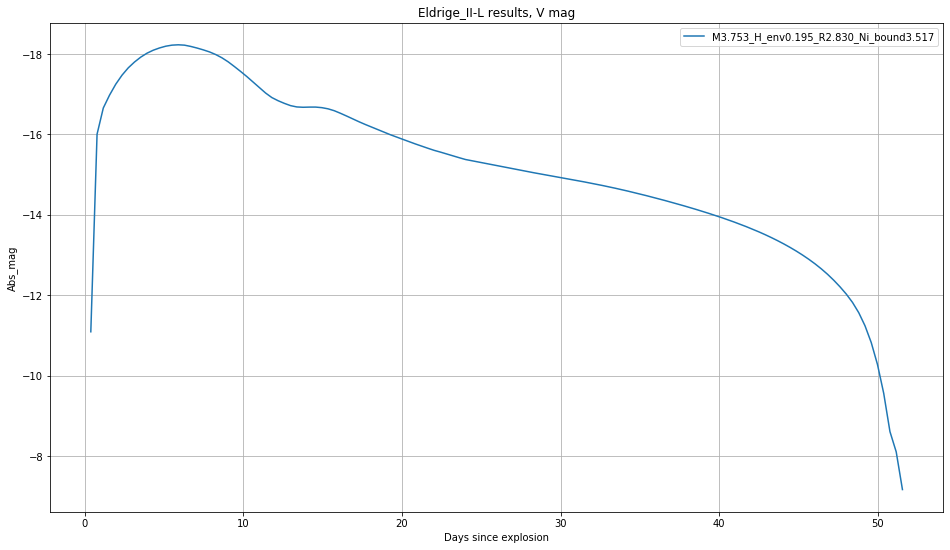

In [6]:
file = open(path+'/II-L_summary.txt','w')
Name,M_FIN, M_H_env, M_H, MNI_bound, T, R, P,E_bind = [],[],[],[],[],[],[],[],[]

plt.rcParams["figure.figsize"] = (16,9)

for i in range(0,int(len(temp)/2-1)):
    if temp[2*i][2]=='4':                                         # Extract type II-L
        name = temp[2*i][0];Name.append(name)
        M_fin = temp[2*i+1][5];M_FIN.append(M_fin)
        M_h = temp[2*i+1][16];M_H.append(M_h)
        if float(temp[2*i+1][6]) != 0:
            M_h_env = float(M_fin) - float(temp[2*i+1][6])
        else:
            M_h_env = float(temp[2*i+1][16])
        M_H_env.append(M_h_env)                                    # Total - He core mass = H envelope mass
        Mni_bound = str(0.9*float(M_fin)+0.1*float(temp[2*i][4])) # Mtot-0.1(Mtot-Mexci)
        MNI_bound.append(Mni_bound)
        t = temp[2*i+1][3];T.append(t)
        r = temp[2*i+1][2];R.append(r)
        p = str(float(temp[2*i+1][34])*365.25);P.append(p)
        E_bind_env=float(temp[2*i+1][25])                             # 26th column, total bunding energy
        E_bind_tot=float(temp[2*i+1][26])
        E_exp=float(temp[2*i][6]) 
        M_exc = float(temp[2*i][4])
        
        line = name+'   '+M_fin+'   '+str(M_h_env)+'   '+str(M_h)+'   '+Mni_bound+\
        '   '+t+'   '+r+'   '+p+'   '+str(E_bind_env)+'   '+str(E_exp)+'   '+str(E_bind_tot)+'   '+str(M_exc)+'\n'
        file.write(line)
        
##### Plotting Eldridge's rewults
#if (float(M_fin)>3.348*0.95) and (float(M_fin)<3.348*1.05):  #Matched with Tm11p200
        mass = 3.637                                                       # To extract models in +- 10%
        envelope = 0.189
        H_mass = 0
        if ((float(M_fin)>mass*0.9) and (float(M_fin)<mass*1.1))and \
        ((float(M_h_env)>envelope*0.9)and(float(M_h_env)<envelope*1.1)):  #Matched with Tm11p200
            T,B = [],[]
            print(temp[2*i+1][5],temp[2*i+1][6], temp[2*i+1][7], temp[2*i+1][8])
            print(temp[2*i+1][16], temp[2*i][0])
            df = pd.read_csv(path2+name+'/data/magnitudes.dat', sep="\s+", header=None)
            print(len(df))
            for j in range(int(len(df)/20)):
                if float(df[0][j * 20]) > 5000:
                    T.append(float(df[0][j*20])/86400);B.append(float(df[10][j*20]))
            plt.figure(1)
            #'_E'+str(1E44-float(temp[2*i][5]))+
            plt.plot(T,B,label = 'M'+str('%0.3f'%float(temp[2*i+1][5]))+'_H_env'+ \
                    str('%0.3f' % M_h_env)+'_R'+str('%0.3f'%float(temp[2*i+1][2]))+\
                     '_Ni_bound'+str('%0.3f' % float(Mni_bound)))
            plt.title("Eldrige_II-L results, V mag");plt.grid()
            plt.xlabel('Days since explosion')
            plt.ylabel('Abs_mag')
file.close()
plt.legend()
plt.gca().invert_yaxis()
plt.show()
## List 여러개 한번에 append 가능하긴 한데, 굉장히 비효율적. 

## 3. Extracting Hydrogen mass in STELLA models<br>
> With calculating the inner product of zone masses in .hyd and mass fractions in .abn file, we can get the total mass of Hydrogen!

In [5]:
ModelPath = 'D:/20-intern/STELLA Model Profiles'

hyd, abn = {},{}
model_name = []
for i in os.listdir(ModelPath):
    name = i[:-4]
    ext = i[-3:]
    if ext == 'hyd':
        df = pd.read_csv(ModelPath+'/'+i, skiprows = 1,sep="\s+",header=None)         # 이러면 row skip이 선행되는듯
        #print(df.values[1],df.values[1,2], df.shape)
        data = df.values
        zone_mass = data[:,1]
        hyd[name] = zone_mass
    elif ext == 'abn':
        df = pd.read_csv(ModelPath+'/'+i, skiprows = 0,sep="\s+",header=None) 
        data = df.values
        #print(df.values[1],df.values[1,2], df.shape)
        mass_frac = data[:,4]
        abn[name] = mass_frac
        model_name.append(name)
#print(hyd[model_name[0]], '\n',abn[model_name[0]])
#print(model_name[0])

H_MASS = {}
for j in model_name:
    zone_mass = hyd[j]
    mass_frac = abn[j]
    H_mass = np.dot(zone_mass, mass_frac)
    print(j, H_mass)
    H_MASS[j] = H_mass

Sm11p1000 0.28209837606764077
Sm11p1200 0.5509309952926458
Sm11p400 0.1018241982008756
Sm11p600 0.07440181488058417
Sm13p1200 0.24474827002893104
Sm13p1700 0.47349592578392113
Tm11p200 0.012694033242510248
Tm11p400 0.040044051088169344


## 4. Extracting similar models<br>
**Here, what i call 'similar' means that each models resembles more then three characteristics of major variables**

STELLA Model =  Tm11p200  M_fin =  3.3480000000000003  M_env =  0.098  H_mass =  0.0127  log10R =  2.463161086
SNEC Model =  []  M_fin =  []  M_env =  []  H_mass =  []  log10R =  []  Ni_bound_frac =  []  E_bind =  []  M_exc =  [] 


STELLA Model =  Tm11p400  M_fin =  3.5869999999999997  M_env =  0.156  H_mass =  0.04  log10R =  2.633367445
SNEC Model =  []  M_fin =  []  M_env =  []  H_mass =  []  log10R =  []  Ni_bound_frac =  []  E_bind =  []  M_exc =  [] 


STELLA Model =  Sm11p400  M_fin =  3.45  M_env =  0.138  H_mass =  0.1018  log10R =  2.6153639369999997
SNEC Model =  []  M_fin =  []  M_env =  []  H_mass =  []  log10R =  []  Ni_bound_frac =  []  E_bind =  []  M_exc =  [] 


STELLA Model =  Sm11p600  M_fin =  3.637  M_env =  0.18899999999999997  H_mass =  0.0744  log10R =  2.73823259
SNEC Model =  ['DE-input-z014-12-0.4-2.8']  M_fin =  [3.75319]  M_env =  [0.19457]  H_mass =  [0.10756]  log10R =  [2.8297]  Ni_bound_frac =  [0.9370618060902859]  E_bind =  [1.923456e+43]  M_exc =  

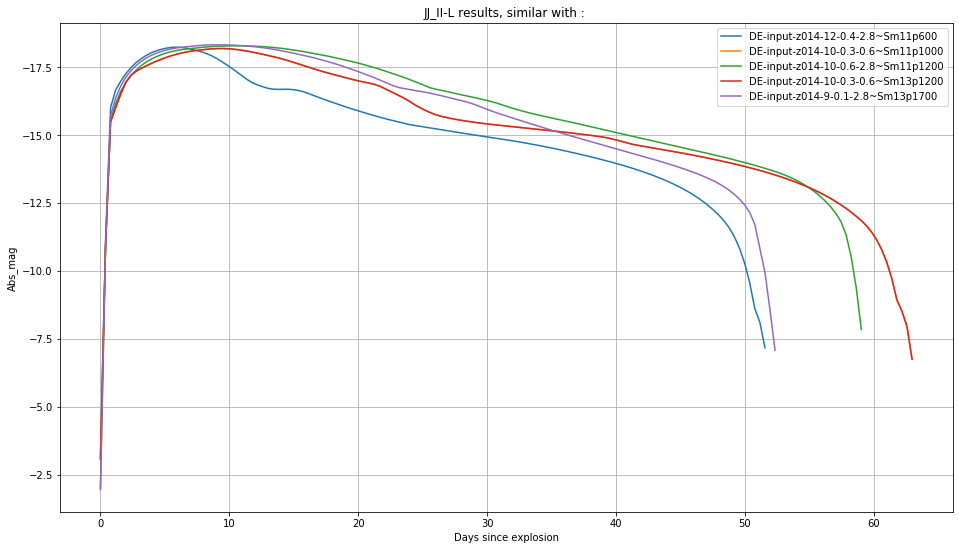

In [16]:
### parameters
# Name,M_FIN, M_H_env, M_H, MNI_bound, T, R, P,E_bind = [],[],[],[],[],[],[],[],[] (SNEC)
#line = name+'   '+M_fin+'   '+str(M_h_env)+'   '+str(M_h)+'   '+Mni_bound+'   '+t+'   '+r+'   '+p+'   ''+
#str(E_bind)+'   '+str(M_exc)+'\n'

# H_MASS = {} , model_name = []                                          (STELLA)
#Model	M_star	M_env	H_mass	R 

### Create dataframes for Stella model and SNEC
Profpass = 'D:/20-intern/II-L summary_STELLA.txt'
Stella = pd.read_csv(Profpass, sep="\s+", header=None)
Comppass = path+'/II-L_summary.txt' 
SNEC = pd.read_csv(Comppass, sep="\s+", header=None)
#print(Stella.values.shape, '\n',Stella.values)
#print(SNEC.values.shape, '\n',SNEC.values)
Model_name = Stella.values[:,0]


###for mass,hydrogen mass, +-20%, for envelope, +-15% for radius, +-10%
plt.rcParams["figure.figsize"] = (16,9)

STORE = open('D:/20-intern/STELLA_SNEC.txt','w')                                         ### Store the nearest models

for i in np.arange(len(Model_name)):
    STE = Stella.values                                                           # datas to array
    SNE = SNEC.values
    Filter = np.zeros(len(SNE[:,0]))
    #print(len(Filter),'\n')
# Mass filter
    M_snec = SNE[:,1].astype(np.float)                                            # M_fin array from SNEC
    M_stella = float(STE[i,1])                                                    # M_fin value from STELLA
    Mass_criteria = [i for i,n in enumerate(M_snec) if n>(0.85*M_stella) and n<(1.15*M_stella)]
    #print(Mass_criteria, M_snec[Mass_criteria])
    Filter[Mass_criteria]+=1
# Envelope filter
    M_env_snec = SNE[:,2].astype(np.float)                                        # M_env array from SNEC
    M_env_stella = float(STE[i,2]) 
    Env_criteria = [i for i,n in enumerate(M_env_snec) if n>(0.85*M_env_stella) and n<(1.15*M_env_stella)]
    #print(Env_criteria, M_env_snec[Env_criteria])
    Filter[Env_criteria]+=1
# Hydrogen filter
    M_hyd_snec = SNE[:,3].astype(np.float)                                        # M_hyd array from SNEC
    M_hyd_stella = float(STE[i,3]) 
    Hyd_criteria = [i for i,n in enumerate(M_hyd_snec) if n>(0.85*M_hyd_stella) and n<(1.15*M_hyd_stella)]
    #print(Hyd_criteria, M_hyd_snec[Hyd_criteria])
    Filter[Hyd_criteria]+=1
# Radius filter
    R_snec = SNE[:,6].astype(np.float)                                            # R array from SNEC
    R_stella = float(STE[i,4]) 
    Rad_criteria = [i for i,n in enumerate(R_snec) if n>(0.95*R_stella) and n<(1.05*R_stella)]
    #print(Rad_criteria, R_snec[Rad_criteria],STE[i,0],'\n')
    Filter[Rad_criteria]+=1
    #print(Filter,'\n')
    
# Filter index for more then 3 == more then 3 criterias had been fulfilled
    INDEX = [i for (i,n) in enumerate(Filter) if n>=3]                           # Similarity check!
    #print(INDEX,'\n')
# STELLA PARAMETERS
    print("STELLA Model = ",STE[i,0]," M_fin = ",STE[i,1]," M_env = ",STE[i,2]," H_mass = ",STE[i,3]," log10R = ",STE[i,4])
# FILTERED SNEC PARAMETERS
    print("SNEC Model = ",SNE[:,0][INDEX]," M_fin = ",M_snec[INDEX]," M_env = ",M_env_snec[INDEX],\
          " H_mass = ",M_hyd_snec[INDEX]," log10R = ",R_snec[INDEX],\
          " Ni_bound_frac = ",SNE[:,4][INDEX]/M_snec[INDEX]," E_bind = ",SNE[:,8][INDEX],\
          " M_exc = ",SNE[:,9][INDEX],'\n'*2)
    
### Plotting the results!
    if INDEX!= None: 
        for NAME in SNE[:,0][INDEX]:
            MEG = pd.read_csv(path2+NAME+'/data/magnitudes.dat', sep="\s+", header=None).values
# masking above certain timestep
            MEG_IDX = np.arange(0,len(MEG),20)
            MASK = [MEG_IDX[i] for i, val in enumerate(MEG[:,10][MEG_IDX]) if val!='+Infinity']
            TIME = MEG[:,0][MASK].astype(float)/86400
            V_mag = MEG[:,10][MASK].astype(float)
            #print('\n'*3,TIME,V_mag,'\n')
            line = STE[i,0]+'\n'+NAME[9:]+'\n'
            STORE.write(line)
            plt.figure(1)
            plt.plot(TIME,V_mag,label = NAME+'~'+STE[i,0])
            
STORE.close()
plt.title("JJ_II-L results, similar with : ");plt.grid()
plt.xlabel('Days since explosion')
plt.ylabel('Abs_mag')
plt.legend()
plt.gca().invert_yaxis()
plt.show()